# House Prices: Advanced Regression Techniques - Attempt at Kaggle Competition
**In this notebook I attempt to create use a series of machine learning models to achieve the best possible result when predicting the value of a house given a collection of explanatory variables. I break this notebook in X parts, where I will import the data, analyse the data, engineer the features, and then create the machine learning models.**

## Part 1: Initialising the Project

** 1.1: Importing the relevent libraries **

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

pd.options.mode.chained_assignment = None

** 1.2: Loading the Data**

In [2]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
total1 = (train,test)
total = pd.concat(total1,sort = False,ignore_index = True)

## Part 2: Analysing the Data

As a way to find more insights about the data I will be working with, I will examine distributions, co-linearity of features, and missing values of the original dataset.

**2.2: Distribution of the output variable**

One of the most important steps is that we take a look at the distribution of the output variable (SalePrice), to see the shape of the data, whether it follows a Gaussian distribution, and finally the skew of the data.

From the plot below it is clear that the data does follow a Gaussian (normal) distribution, and appears to be skewed slightly to the right. In order to fix the skew, a log transformation of the output variable may be necessary to recieve more accurate results.

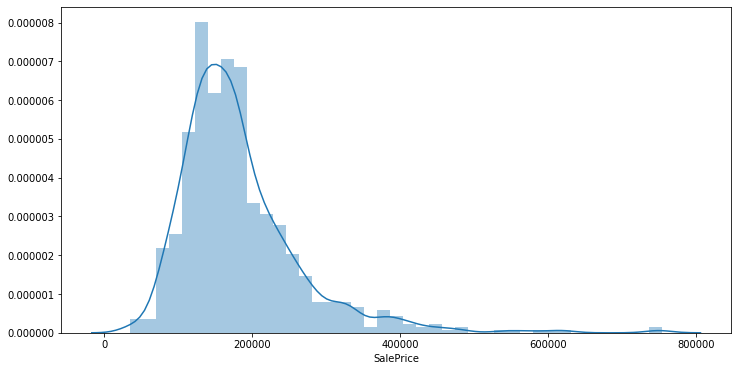

In [3]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(train['SalePrice'])

**2.2: Examining distributions of continuous data:**

Below gives a general summary of the data I will be working with. We can see for example that the mean of 'LotArea' is 10,168.1(1dp), the mean year that the house was built was 1971, and the mean 'LotFrontage' was 69.3(1dp). Some variables seem to contain a strange skew of data - for example the mean of 'PoolArea' is 2.25 whereas the 25%, 50% and 75% quantiles are all of values 0. This hints that I may have to use some form of manipulation on this attribute to allow for more useful insights.

In [4]:
total.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,978.000000,978.000000,804.000000,978.000000,978.000000,978.000000,978.000000,978.000000,973.000000,978.000000,...,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,782.000000
mean,488.500000,56.232106,70.063433,10471.009202,6.107362,5.573620,1971.837423,1985.203476,103.865365,446.020450,...,94.733129,46.930470,20.824131,4.676892,16.021472,1.230061,44.155419,6.247444,2007.823108,183335.726343
std,282.468582,42.286738,23.792214,8932.435958,1.413391,1.128036,30.026143,20.532135,179.877563,441.907515,...,124.239753,67.249541,58.223845,34.937580,56.710785,27.268130,536.365960,2.714704,1.333145,84405.797663
min,0.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,244.250000,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,130625.000000
50%,488.500000,50.000000,70.000000,9485.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,385.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165800.000000
75%,732.750000,70.000000,80.000000,11742.500000,7.000000,6.000000,2000.000000,2004.000000,167.000000,719.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213497.500000
max,977.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,330.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


**2.2: Removing features that are too difficult to work with or will provide little information **

There are a series of variables that look as if they would provide little information in terms of the output variable - the house value. As well as this, there are some variable that are far too heavily consistant of one value - for example 'landslope' consists 95% of a single value. Furthermore, some features contain so many different values that one-hot-encoding would be too difficult to perform. Below I drop these features from the dataset.

In [5]:
del total['MSSubClass']
del total['MSZoning']
del total['LotFrontage']
del total['Street']
del total['Alley']
del total['LandContour']
del total['Utilities']
del total['LandSlope']
del total['Condition1']
del total['Condition2']
del total['RoofStyle']
del total['RoofMatl']
del total['Exterior2nd']
del total['MasVnrType']
del total['MasVnrArea']
del total['BsmtCond']
del total['BsmtExposure']
del total['BsmtFinType1']
del total['BsmtFinSF2']
del total['BsmtUnfSF']
del total['Heating']
del total['Electrical']
del total['2ndFlrSF']
del total['GrLivArea']
del total['FullBath']
del total['HalfBath']
del total['Functional']
del total['Fireplaces']
del total['FireplaceQu']
del total['GarageType']
del total['GarageYrBlt']
del total['GarageFinish']
del total['GarageCars']
del total['GarageQual']
del total['GarageCond']
del total['3SsnPorch']
del total['ScreenPorch']
del total['PoolArea']
del total['Fence']
del total['MiscFeature']
del total['MiscVal']
del total['SaleType']
del total['SaleCondition']
del total['PoolQC']
del total['BsmtQual']
del total['BsmtFinSF1']
del total['BsmtFinType2']
del total['BsmtHalfBath']
del total['BsmtFullBath']
del total['MoSold']
del total['WoodDeckSF']
del total['OpenPorchSF']
del total['EnclosedPorch']
del total['Exterior1st']
del total['LotConfig']

**2.3: Examining Missing Values: **

Below I look for missing values across all attributes. Missing values can lead to problems when feeding the data through a machine learning algorithm - particularly regression where the data must be numerical by nature. 

It is clear that in total we have 2919 data objects, with 81 variables - 79 being exaplanatory variables, 1 being the output variable, and 1 being the 'Id' variable, which shows no relation to the output. I then drop all null values - there is not a massive amount of missing values across any one attribute.

In [6]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 26 columns):
Id              978 non-null int64
LotArea         978 non-null int64
LotShape        978 non-null object
Neighborhood    978 non-null object
BldgType        978 non-null object
HouseStyle      978 non-null object
OverallQual     978 non-null int64
OverallCond     978 non-null int64
YearBuilt       978 non-null int64
YearRemodAdd    978 non-null int64
ExterQual       978 non-null object
ExterCond       978 non-null object
Foundation      978 non-null object
TotalBsmtSF     978 non-null int64
HeatingQC       978 non-null object
CentralAir      978 non-null object
1stFlrSF        978 non-null int64
LowQualFinSF    978 non-null int64
BedroomAbvGr    978 non-null int64
KitchenAbvGr    978 non-null int64
KitchenQual     978 non-null object
TotRmsAbvGrd    978 non-null int64
GarageArea      978 non-null int64
PavedDrive      978 non-null object
YrSold          978 non-null int64
SalePrice

In [7]:
total = total[pd.notnull(total['KitchenQual'])]
total = total[pd.notnull(total['KitchenQual'])]
total = total[pd.notnull(total['TotalBsmtSF'])]
total = total[pd.notnull(total['GarageArea'])]

**2.4: Correlation Matrix**

Below I construct a correlation matrix using the training dataset to see which variables are colinear - with eachother, and more importantly with the output variable.

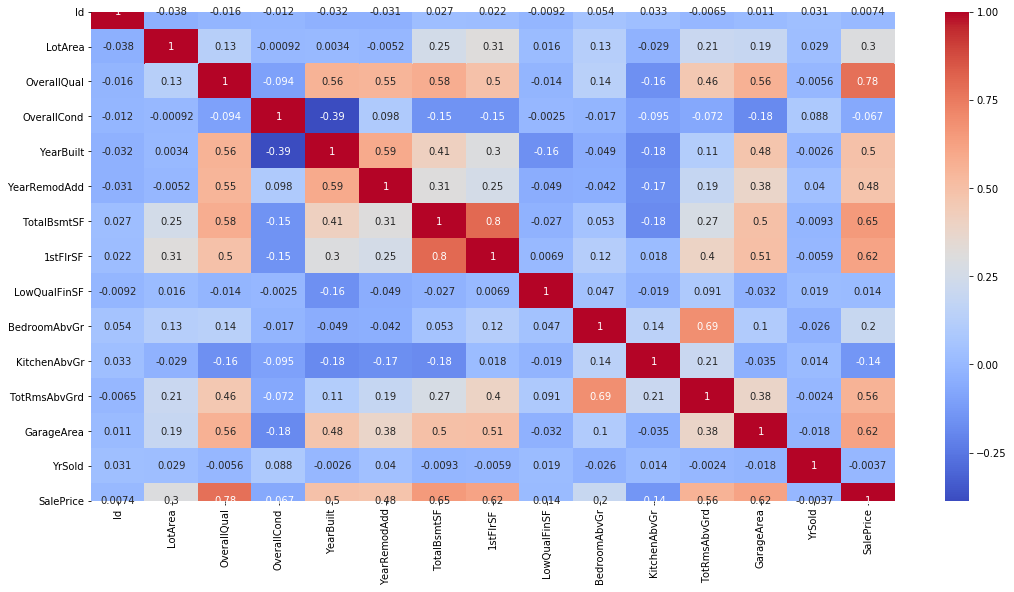

In [8]:
train = total.dropna()
plt.figure(figsize=(18, 9))
g = sns.heatmap(train.corr(),annot=True, cmap = "coolwarm")

**General notes from the above correlation map are:**
* TotRmsAbvGrd and BedroomAbvGrd are stronly correlation (r = 0.68). BedroomAbvGrd is not stronly correlated with SalePrice whereas TotRmsAbvGrd is, so I will remove BedroomAbvGrd variable
* LowQualFinSF is not correlated enough with SalePrice, so will be removed
* OverallQual seems to have the highest correlation with SalePrice (r = 0.79). Although it is very collinear with other attributes (e.g YearBuilt and TotalBsmtSF)
* Yrsold surprisinly has a slight negative correlation with SalePrice - one would expect that inflation would mean that the prices would be higher the more recently they had been sold. This will also be removed
* TotalBsmtSF and 1stFlrSF are very collinear (r = 0.82), so 1stFlrSF will be removed.

In [9]:
# Removing additional features
del total['YrSold']
del total['LowQualFinSF']
del total['1stFlrSF']
train = total.dropna()

**2.5: Examining Categorical Feature Relations with Output**

Although continuous variables can easily be visualised in a correlation matrix, I still need to find out whether some of the categorical features I have selected are related to the final sale price of the house.

/usr/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


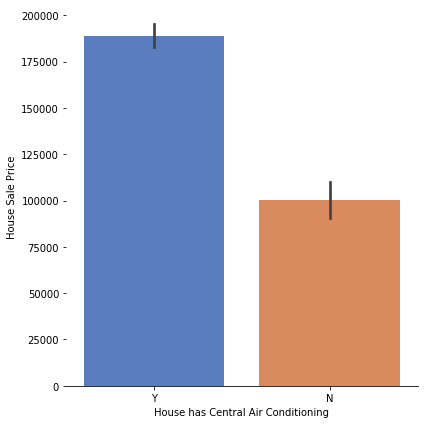

In [10]:
g = sns.factorplot(x="CentralAir", y="SalePrice",  data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("House Sale Price")
g = g.set_xlabels("House has Central Air Conditioning")

We can see that central air-conditioning is an important feature when determining how much a house will be values at. Those that do not have central air conditioning are worth significantly less than those that do have central air-conditioning

col_0,count
Foundation,
BrkTil,94
CBlock,426
PConc,431
Slab,19
Stone,5
Wood,3


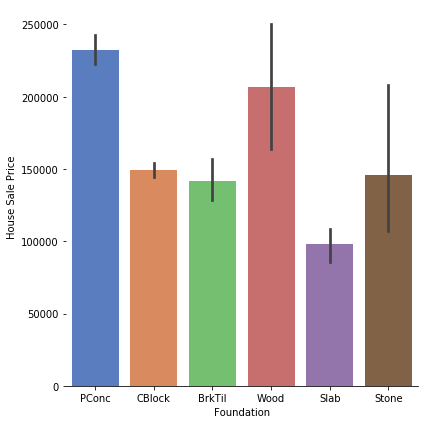

In [11]:
f = sns.factorplot(x="Foundation", y="SalePrice",  data=train, size=6, kind="bar", palette="muted")
f.despine(left=True)
f = f.set_ylabels("House Sale Price")
f = f.set_xlabels("Foundation")
pd.crosstab(index=total["Foundation"], columns="count")

Foundation appears to be an important feature for predicting sale price, with PConc (concrete) being the most valuable of all foundation types. Houses with this foundation are worth significantly more on average than the second most common foundation (CBlock). 

col_0,count
BldgType,
1Fam,820
2fmCon,20
Duplex,31
Twnhs,32
TwnhsE,75


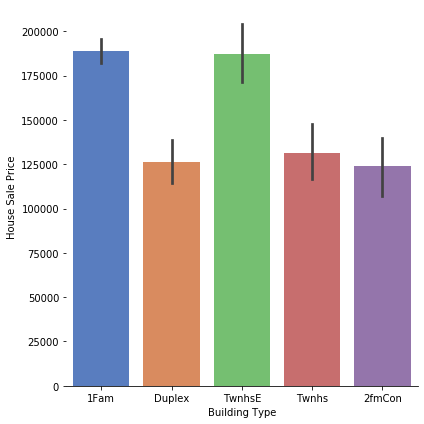

In [12]:
g = sns.factorplot(x="BldgType", y="SalePrice",  data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("House Sale Price")
g = g.set_xlabels("Building Type")
pd.crosstab(index=total["BldgType"], columns="count") 

1 family houses are generally worth much more than all other house types other than TwnhsE (extended townhouses). Because of the similarity and small number of observations amongst other housing types, it would make sense to combine all other housing types other than 1Fam and TwnhsE into their own own group.

col_0,count
HouseStyle,
1.5Fin,102
1.5Unf,12
1Story,493
2.5Fin,3
2.5Unf,6
2Story,292
SFoyer,27
SLvl,43


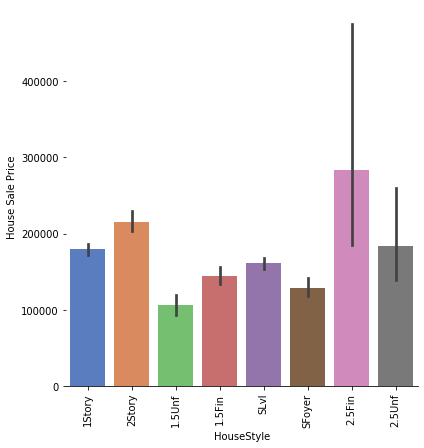

In [13]:
g = sns.factorplot(x="HouseStyle", y="SalePrice",  data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("House Sale Price")
g = g.set_xlabels("HouseStyle")
plt.xticks(rotation=90)
pd.crosstab(index=total["HouseStyle"], columns="count")

The 2-story equivalent is on average worth a significant amount more than it's 1-story counterpart. Those that fall into neither 1 nor 2 story may be lumped into their own category (SFoyer, SLvl).

col_0,count
Neighborhood,
Blmngtn,12
Blueste,2
BrDale,12
BrkSide,43
ClearCr,20
CollgCr,99
Crawfor,36
Edwards,63
Gilbert,46


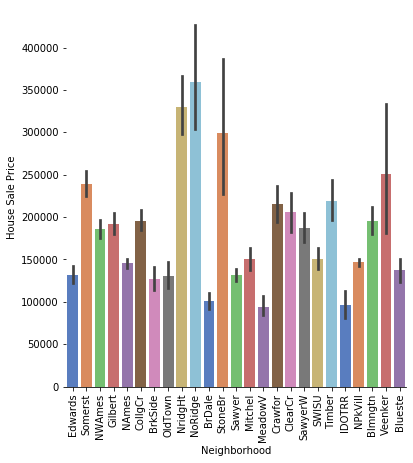

In [14]:
g = sns.factorplot(x="Neighborhood", y="SalePrice",  data=train, size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("House Sale Price")
g = g.set_xlabels("Neighborhood")
plt.xticks(rotation=90)
pd.crosstab(index=total["Neighborhood"], columns="count")

Although neighbourhood has a spread of 25 different values (meaning it will be cumbersome to dummy-encode), it appears to have a vital role in how much a house is worth. As well as this, the data is relatively spread out over all areas, so each neighborhood should have a fairly good estimate without many outliers. The saying holds true "It's all about location", as we can see there are clear differences between the sale prices of houses in different neighborhoods.

col_0,count
LotShape,
IR1,336
IR2,25
IR3,5
Reg,612


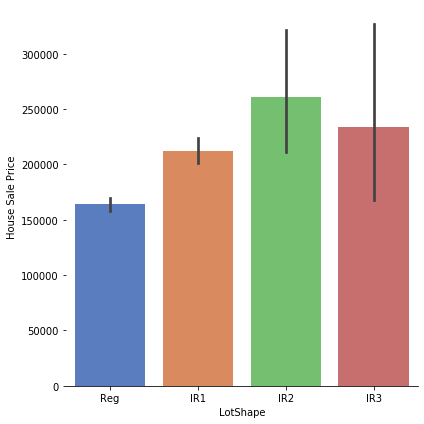

In [15]:
f = sns.factorplot(x="LotShape", y="SalePrice",  data=train, size=6, kind="bar", palette="muted")
f.despine(left=True)
f = f.set_ylabels("House Sale Price")
f = f.set_xlabels("LotShape")
pd.crosstab(index=total["LotShape"], columns="count")

Values that are irregular seem to all be valued slightly higher than those that are described as regular. This hints that I should combine all features that are irregular (to some degree) into a single feature, making it much easier to dummy-encode.

# Part 3: Feature Engineering
An important part of any machine-learning project is to make sure that the features fed into the algorithm are of the correct format, and have as little noise as possible. In this section I combine values, dummy-encode, one-hot encode, and discretize some features in order to ensure that the data is perfect (as I can get it) before selecting the algorithm of choice.

**3.1: Discretizing Variables**

Some variables come in a very clear ordinal format - for example there are a bunch of features refering to quality on a 1-5 rating scale. I discretize these values to be numbers rather than statements - as numerical data is a must when working with regression. I also discretize to binary a feature.

In [16]:
total["CentralAir"] = total["CentralAir"].replace(["Y","N"],[1,0])
total["ExterQual"] = total["ExterQual"].replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
total["HeatingQC"] = total["HeatingQC"].replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
total["KitchenQual"] = total["KitchenQual"].replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])
total["ExterCond"] = total["ExterCond"].replace(["Po","Fa","TA","Gd","Ex"],[1,2,3,4,5])

** **

**3.2: Combining values of Features **

Some features have values that could be combined together due to how similar they are in terms of there relation with the output variable (sale price). There are also some that have such low amounts of entries that they must have more entries to provide reliable information, or else they could be very susceptable to outliers.

In [17]:
total["LotShape"] = total["LotShape"].replace(["IR1","IR2","IR3"],["IR","IR","IR"])
total["BldgType"] = total["BldgType"].replace(["2fmCon","Duplex","Twnhs"],["OtherBldg","OtherBldg","OtherBldg"])
total["Foundation"] = total["Foundation"].replace(["Slab","Stone","Wood"],["OtherFound","OtherFound","OtherFound"])
total["PavedDrive"] = total["PavedDrive"].replace(["P"],["N"])
total["HouseStyle"] = total["HouseStyle"].replace(["1.5Fin","1.5Unf","2.5Fin","2.5Unf","SFoyer","SLvl"],["1StoryOther","1StoryOther","2StoryOther","2StoryOther","Other","Other"])

**3.3: Dummy Encoding Remaining Categorical Variables **

As shown in section 2, there are a series of variables that have strong relations to the output variable (SalePrice), but are categorical rather than numerical data. In order to fix this, I perform a combination of dummy-encoding and one-hot encoding in order to turn these attributes into a series of binary attributes - meaning that they can be used in the regression algorithm.

In [18]:
#Creating dummy variables
dummy_BldgType = pd.get_dummies(total['BldgType'])
dummy_LotShape = pd.get_dummies(total['LotShape'])
dummy_Foundation = pd.get_dummies(total['Foundation'])
dummy_PavedDrive = pd.get_dummies(total['PavedDrive'])
dummy_Neighborhood = pd.get_dummies(total['Neighborhood'])
dummy_HouseStyle = pd.get_dummies(total['HouseStyle'])


#Appending onto the total set
total = total.join(dummy_BldgType)
total = total.join(dummy_LotShape)
total = total.join(dummy_Foundation)
total = total.join(dummy_PavedDrive)
total = total.join(dummy_Neighborhood)
total = total.join(dummy_HouseStyle)


#Deleting the original feature
del total['BldgType']
del total['LotShape']
del total['Foundation']
del total['PavedDrive']
del total['Neighborhood']
del total['HouseStyle']

**3.4: Log transformation of the output variable **

As mentioned in the beginning of section 2, the natural distribution of SalePrice may lend itself to a log-transform - meaning that we take the log of each value in the dataset in order to account for the variance and skew. I have visualised this below:

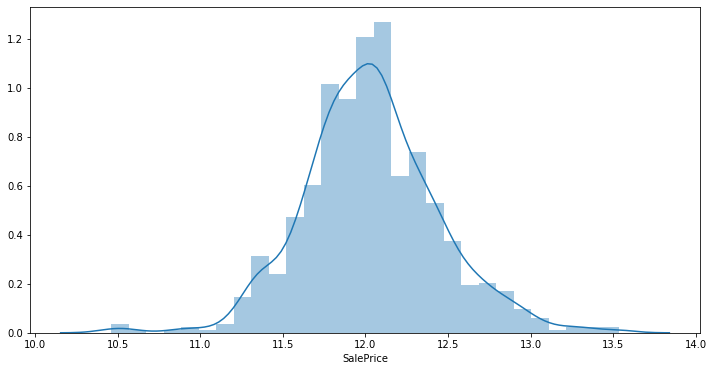

In [19]:
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(np.log(train['SalePrice']))

# Part 4: Selecting a Machine Learning Model

In this section I will test a variety of regression-based machine learning models. In order to see which gives the best results, I will split the **training** set further into sub-training and sub-testing sets a collection of times, and then evaluate which of these provides the best result in terms of accuracy. I plan to evaluate three different machine learning algorithms, and select the final model based on which of these models minimizes the sub-testing error. I will be using RMSLE (root mean squared log error) to evaluate accuraccy in this case, as I have performed a log-transformation on the output variable.

The algorithms I plan to use are:
* Linear Regression
* Lasso Regression
* Ridge Regression

**4.1: Final data manipulation**

Before the data is in the best possible form to be fed into a machine learning algorithm, there are still a few final adjustments I must make. These include dropping the 'Id' variable, and defining the sub-training and sub-testing sets

In [20]:
train = total.dropna()
y = np.log(train['SalePrice'])
Xs = train.drop(['SalePrice','Id'], axis=1)

**4.2: Defining the cross validation function, and defining the RMSLE function**

To select the parameters for each regression model, I will be using the method of K-fold cross validation. This involves splitting the sub-training set into k subsets, using 1 subset as the validation set, and the remaining k-1 subsets as the training set. This will then be repeated k times, with each of the k subsets taking a turn at being the validation set.

In [21]:
#Validation function
n_folds = 5

#RMSLE function
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(Xs.values)
    rmse= np.sqrt(-cross_val_score(model, Xs.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**4.3: Linear Regression model: **

We can see that linear regression provides an RMSLE score of 0.1556.

In [22]:
#Initialising linear regression 
lin_reg = LinearRegression()

#Displaying the results
score_lin = rmsle_cv(lin_reg)
print("\nLinear regression score: {:.4f} ({:.4f})\n".format(score_lin.mean(), score_lin.std()))


Linear regression score: 0.1560 (0.0102)



**4.4: Lasso Regression model: **

We can see that lasso regression provides an RMSLE score of 0.1551.

In [23]:
#Initialising lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Displaying the results
score = rmsle_cv(lasso)
print("\nLasso regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso regression score: 0.1555 (0.0104)



**4.5: Ridge regression model: **

We can see that ridge regression provides an RMSLE score of 0.1556 (same as linear regression)

In [24]:
#Initialising ridge regression
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=1))

#Displaying the results
score = rmsle_cv(ridge)
print("\nRidge regression score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge regression score: 0.1560 (0.0102)



**4.6: General comments on performance on the sub-training and sub-testing sets:**

As ridge regression provided the lowest error value (RMSLE = 0.1551) I will be choosing to use ridge regression to predict the final values of SalePrice in the testing dataset.

Clearly the RMSLE value isn't near as high as many other kernels on Kaggle... Looking back on this project, considering I am using lasso regression, and the machine learning models weren't especially computationally expensive to run, I could have potentially removed many less features in section 2 - *the curse of dimensionality may not have been as bad as I originally assumed*.

But hey you have to start somewhere, and considering this was my first project without copying code or ideas for preprocessing I am reasonably happy : )

# Part 5: Output to the testing set for submission

In this final step, I will use selected ridge regression model to predict 'SalePrice' across the testing set.